# **Email Spam Detection Using Machine Learning**

In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the data
data = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
# Step 2: Data Cleaning
# Remove unnecessary columns and renaming for clarity
data = data[['v1', 'v2']]
data.columns = ['label', 'text']  

In [4]:
# Convert labels to binary values (spam = 1, ham = 0)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [11]:
# Step 3: Data Exploration 
print(data['label'].value_counts())  # Show distribution of classes
print(data.head())  # Check first few rows of data

label
0    4825
1     747
Name: count, dtype: int64
   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [13]:
# Step 4: Split the dataset into training and testing sets
X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Step 5: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [15]:
# Step 6: Model Selection
# Here I’ll use Naive Bayes, Logistic Regression, SVM, and Random Forest
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [16]:
# Step 7: Model Training, Evaluation & Hyperparameter Tuning using GridSearchCV
# Here I perform GridSearch for model hyperparameter optimization.
best_models = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Hyperparameters for tuning (specific to each model)
    if model_name == 'Naive Bayes':
        param_grid = {'alpha': [0.5, 1.0, 1.5]}
    elif model_name == 'Logistic Regression':
        param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']}
    elif model_name == 'Support Vector Machine':
        param_grid = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    elif model_name == 'Random Forest':
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30]}
    
    # Setting up GridSearchCV for hyperparameter optimization
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train_tfidf, y_train)
    
    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")


Training Naive Bayes...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters for Naive Bayes: {'alpha': 0.5}

Training Logistic Regression...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}

Training Support Vector Machine...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for Support Vector Machine: {'C': 1, 'kernel': 'linear'}

Training Random Forest...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters for Random Forest: {'max_depth': 30, 'n_estimators': 200}



Evaluating Naive Bayes on the test set...
Accuracy of Naive Bayes: 0.98
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.85      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



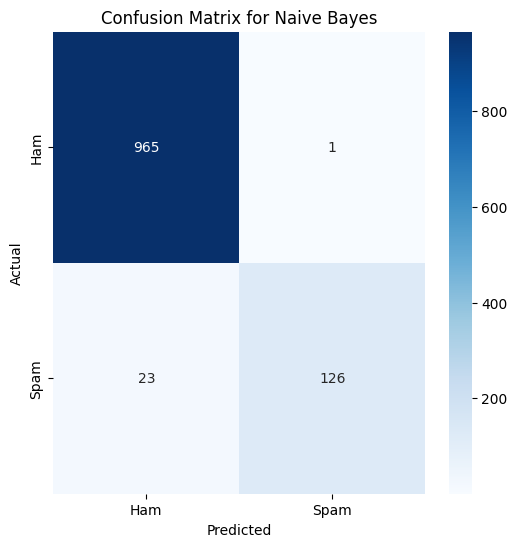


Evaluating Logistic Regression on the test set...
Accuracy of Logistic Regression: 0.98
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



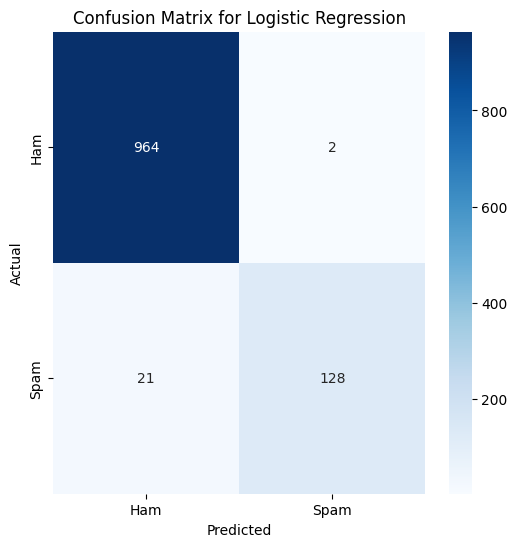


Evaluating Support Vector Machine on the test set...
Accuracy of Support Vector Machine: 0.98
Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



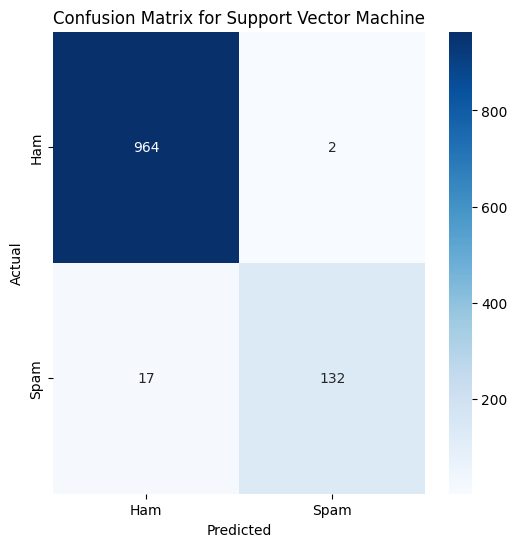


Evaluating Random Forest on the test set...
Accuracy of Random Forest: 0.97
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



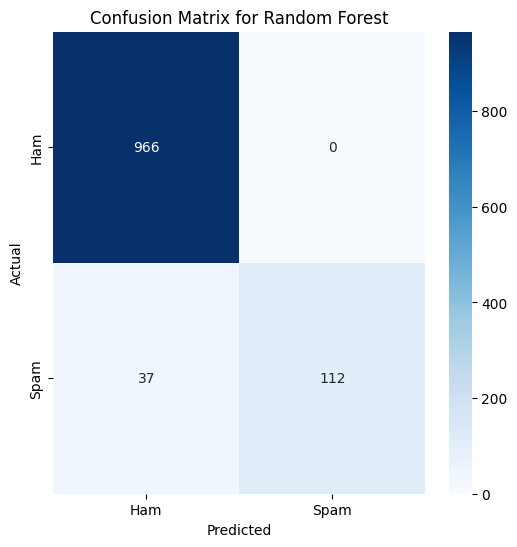

In [17]:
# Step 8: Evaluation on Test Data
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name} on the test set...")
    
    # Predicting on the test data
    y_pred = model.predict(X_test_tfidf)
    
    # Accuracy and Classification Report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model_name}: {accuracy:.2f}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")
    
    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [18]:
# Step 9: Final Model Selection
# Chose the best model based on the evaluation metrics, like accuracy or F1-score.
# Chose the one with the highest accuracy or F1 score.

final_model = best_models['Naive Bayes']  

In [19]:
# Step 10: Save the Model for Future Use
import joblib
joblib.dump(final_model, 'spam_detector_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("\nModel and vectorizer saved for future use.")


Model and vectorizer saved for future use.
